# Part 2: Probability Fundamentals

## What is probability?

- likelihood of an event occurring
- how often something is expected to happen out of all possible times it could happen
- ds is often about making predictions:
    - probability a customer will churn
    - probability the model's prediction is correct
    - probability the marketing campaign will increasae sales by 10%

## Basic terminology

Example: rollig the dice

- Experiment: process that is observed (rolling a die)
- Outcome: single possible result of the experiment (getting a 6)
- Sample space: alll possible outcomes (for a regular die {1, 2, 3, 4, 5, 6})
- Event: set of outcomes to which a probability is assigned (eg rolling a 1)

Probability values range from 0 to 1
- 0 means an event will never happen (rolling a 7 on a 6-sided die)
- 1 means the event will always happen (rolling a number between 1 and 6)

## Calculating basic probabilities

- Basic probability formula:

$$ p(event) = \frac{number\_of\_favourable\_ outcomes} {total\_ number\_ of\_ possible\_ outcomes} $$

Example 1: Probability of rolling a 4

Example 2: Probability of rolling an even number

Example 3: Probability of drawing King from a deck of 52 cards

## Complement rule
- Sometimes easier to calculate the probability that something doesn't happen

$$p(\neg A) = 1 - p(A)$$

Example: If the probability of rolling a 6 is 1/6, what's the probability of not rolling a 6?

## Types of Events and Rules

### Independent Events - No Influence
- events are independent if the outcome of one event doe snot affect the outcome of another event
- example: flipping a coin twice
- if the events are independent:

$$p(A \land B) = P(A) * P(B)$$

Example: Probability of rolling two 6 in a row

Example: Why is it so hard to win the lottery?

### Dependent Events - Influence Each Other

- outcome of one event affects outcome of another event
- Example: Drawing cards from a deck without replacememt
- Conditional probability: probability of B happening, given that A has happened already

$$P(A|B) = \frac{P(A \land B)}{P(B)}$$

- Example: My neighbor has 2 children. I learn that one is a son. What is the probability that the other is also a son?
- Most events are dependent! Crucial to understand for DS

### Mutually Exclusive Events - Cannot Happen Together
- some events cannot happen at the same time, no overlap
- example: rolling two different numbers with the same die roll
- probability of one of mutually exclusive events happening is the sum of their individual probabilities

$$p(A \lor B) = P(A) + P(B)$$

### Non Mutually Exclusive Events - Can Overlap

- Some events can happen at the same time
- Example: Drawing a King or a Spade from a deck of cards

$$P(A \lor B) = P(A) + P(B) - P(A \land B)$$

P(King) = 4/52

P(Spade) = 13/52

P(King and Spade) = 1/52

P(King or Spade) = 4/52 + 13/52 - 1/52 = 16/52 = 0.308

### Bayesian Rule - Updating Beliefs

- Posterior probability (updated probability after the evidence is considered)
- Prior probability (the probability before the evidence is considered)
- Likelihood (probability of the evidence, given the belief is true)
- Marginal probability (probability of the evidence, under any circumstance)

$$P(A|B) = P(A) \frac{P(B|A)}{P(B)}$$


Example: Your neighbour is watching their favourite football team. You hear them cheering, and want to estimate the probability their team has scored.
- Probability of goal: $P(goal) = 0.2$
- Probability of neighbor cheering if goal: $P(cheer|goal)=0.9$
- Probability of neighbor cheering: $P(cheer|goal) + P(cheer|no\_goal) = 0.2*0.9 + 0.1*0.98$

$$P(goal|cheer) = 0.2 * \frac{0.9}{0.2*0.9 + 0.1*0.98}$$

## Probability distributions

- describe how probabilities are spread across *all* the possible outcomes of an experiment
- can be discrete or continuous

### Discrete Probability Distributions

- countable outcomes

#### Binomial Distribution

- fixed number of independent trials
- each trial has only two outcomes (success/failure)
- example: coin flip
- binomial gives you the probability of success

- real life example: "How likely is it that 7 out of 10 customers will click on an add, if each customer has a 60% chance?"

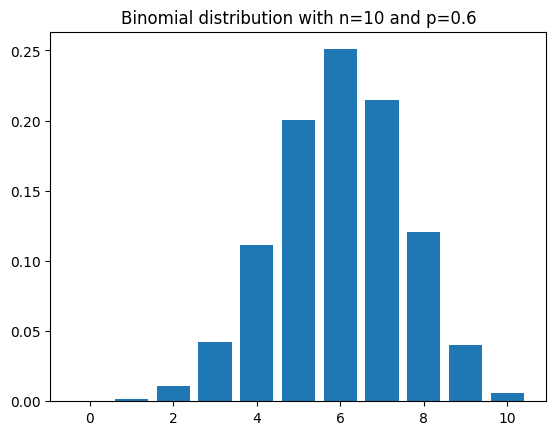

In [10]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 10
p = 0.6
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
_ = plt.title(f'Binomial distribution with {n=} and {p=}')

#### Poisson Distribution

- describes the probability of obtaining k successes during a given time interval
- example: Bus M45 in Berlin comes three times per hour on average. What is the probability that 5 buses come in an hour?

In [11]:
from scipy.stats import poisson

#calculate probability
poisson.pmf(k=5, mu=3)

np.float64(0.10081881344492458)

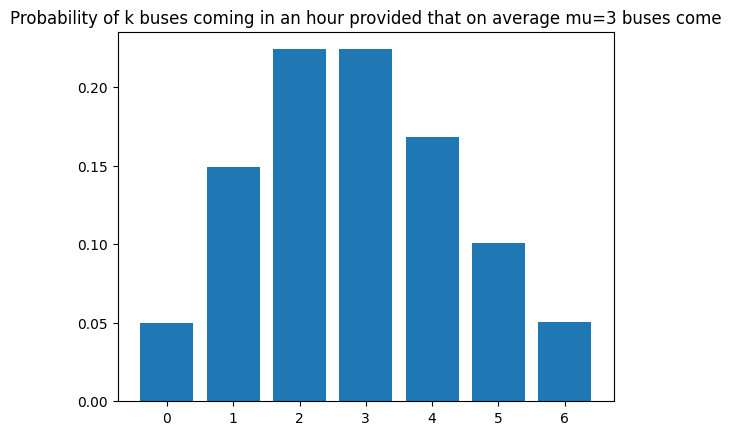

In [18]:
# probability of 1...6 buses coming when on average mu buses come

mu = 3
dist = [poisson.pmf(k, mu) for k in range(0, 7)]
plt.bar(range(0, 7), dist)
_ = plt.title(f'Probability of k buses coming in an hour provided that on average {mu=} buses come')

In [14]:
# probability that no buses come

poisson.cdf(k=0, mu=3)

np.float64(0.04978706836786395)

In [16]:
# probability that more than 4 buses come

1 - poisson.cdf(k=4, mu=3)

np.float64(0.1847367554762278)

### Continuous Probability Distributions

- for data that we can measure
- e.g. height / temperature

#### Normal Distribution - "the bell curve"

- also known as Gaussian
- most important distribution in data science!
- symmetric
- mean, median and mode are the same
- many natural phenomena follow a normal distribution

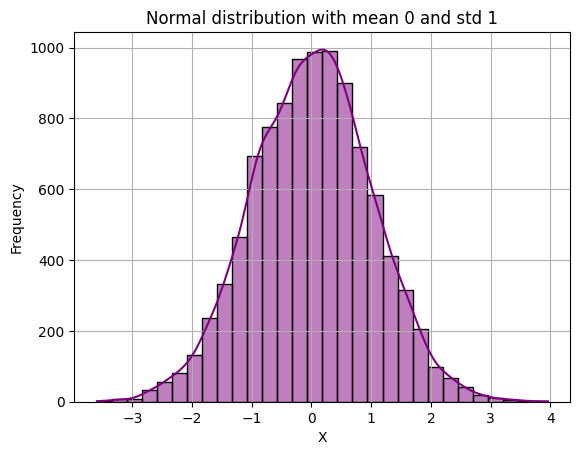

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loc = 0
scale = 1
data = np.random.normal(loc=loc, scale=scale, size=10000)

sns.histplot(data, kde=True, bins=30, color='purple')

# Labels and title
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid()
_ = plt.title(f'Normal distribution with mean {loc} and std {scale}')

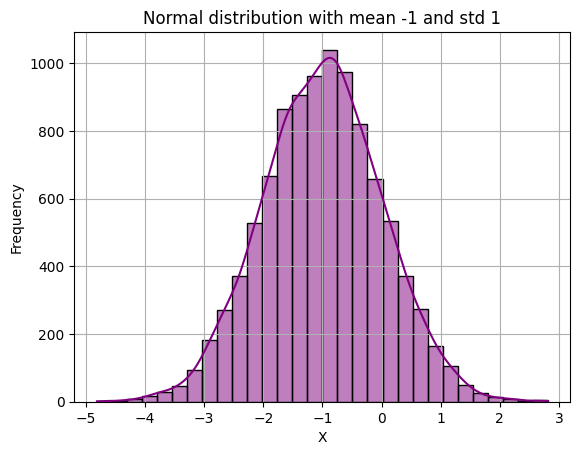

In [27]:
loc = -1
scale = 1
data = np.random.normal(loc=loc, scale=scale, size=10000)

sns.histplot(data, kde=True, bins=30, color='purple')

# Labels and title
plt.xlabel('X')
plt.ylabel('Frequency')
plt.grid()
_ = plt.title(f'Normal distribution with mean {loc} and std {scale}')

##### Empirical Rule (for Normal Distributions)

- 68% of data falls within one std of the mean
- 95% of data falls within two std of the mean
- 99.7% of the data falls within 3 std of the mean

## Recap

- how to calculate basic probabilities
- dependent vs independent events
- mutually exclusive vs non mutually exclusive events
- brief introduciton to probability distributions
- especially the mighty Gaussian!

## Questions?